### Initial project set up.

In [15]:
# Install necessary dependencies and modules
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Set up symbols for Oil and Telecom companies
oil_symbols = {
    'Exxon Mobile': 'XOM',
    'Chevron': 'CVX',
    'ConocoPhillips': 'COP'
}

tele_symbols = {
    'AT&T': 'T',
    'T-Mobile': 'TMUS',
    'Verizon': 'VZ'
}


In [16]:
# Function to fetch stock data using yfinance
def fetch_yfinance_data(symbol):
    stock_data = yf.download(symbol, start="2020-01-01", end="2022-01-01")
    return stock_data



### Data fetching codes by industry: Telecom - Oil.

In [17]:
# Fetch data for Exxon Mobile, Chevron, and ConocoPhillips for Oil Stocks Analysis
oil_stock_data = {}
for company, oil_symbol in oil_symbols.items():
    oil_stock_data[company] = fetch_yfinance_data(oil_symbol)

# Combine the data into a single DataFrame for all oil companies
combined_oil_data = pd.concat(oil_stock_data.values(), keys=oil_stock_data.keys())
combined_oil_data.reset_index(level=0, inplace=True)
combined_oil_data.rename(columns={'level_0': 'Company'}, inplace=True)

# Output the combined oil data for validation (optional)
print(combined_oil_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                 Company       Open       High        Low      Close  \
Date                                                                   
2020-01-02  Exxon Mobile  70.239998  71.019997  70.239998  70.900002   
2020-01-03  Exxon Mobile  71.339996  71.370003  70.160004  70.330002   
2020-01-06  Exxon Mobile  70.320000  71.360001  70.230003  70.870003   
2020-01-07  Exxon Mobile  70.500000  70.519997  69.510002  70.290001   
2020-01-08  Exxon Mobile  70.110001  70.290001  69.169998  69.230003   

            Adj Close    Volume  
Date                             
2020-01-02  56.088299  12456400  
2020-01-03  55.637390  17386900  
2020-01-06  56.064564  20081900  
2020-01-07  55.605743  17387700  
2020-01-08  54.767174  15137700  


In [18]:
# Fetch data for AT&T, T-Mobile, and Verizon for Telecom Stock Analysis
tele_stock_data = {}
for company, tele_symbol in tele_symbols.items():
    tele_stock_data[company] = fetch_yfinance_data(tele_symbol)

# Combine the data into a single DataFrame for all telecom companies
combined_tele_data = pd.concat(tele_stock_data.values(), keys=tele_stock_data.keys())
combined_tele_data.reset_index(level=0, inplace=True)
combined_tele_data.rename(columns={'level_0': 'Company'}, inplace=True)

# Output the combined telecom data for validation (optional)
print(combined_tele_data.head())



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

           Company       Open       High        Low      Close  Adj Close  \
Date                                                                        
2020-01-02    AT&T  29.577040  29.622356  29.237160  29.350452  20.324379   
2020-01-03    AT&T  29.138973  29.607250  29.131420  29.501511  20.428986   
2020-01-06    AT&T  29.448641  29.569487  29.320242  29.531721  20.449902   
2020-01-07    AT&T  29.516617  29.682779  29.441088  29.645016  20.528355   
2020-01-08    AT&T  29.705439  29.871601  29.675226  29.735649  20.591116   

              Volume  
Date                  
2020-01-02  43165445  
2020-01-03  36296666  
2020-01-06  51229797  
2020-01-07  37337462  
2020-01-08  53645832  


### Data Cleaning and Organization.

In [27]:
# Ensure the Date is the index and reset it to a column
combined_tele_data = combined_tele_data.reset_index()

# Convert the Tele Date column to datetime format
combined_tele_data['Date'] = pd.to_datetime(combined_tele_data['Date'])

# Sort the data by Company and Date
combined_tele_data.sort_values(by=['Company', 'Date'], inplace=True)

# Handle missing values (if any)
combined_tele_data.ffill(inplace=True)
combined_tele_data.bfill(inplace=True)

# Filter the data to include only dates from 2021-01-01 to 2022-01-01
start_date = pd.Timestamp('2021-01-01')
end_date = pd.Timestamp('2022-01-01')
filtered_tele_data = combined_tele_data[(combined_tele_data['Date'] >= start_date) & (combined_tele_data['Date'] <= end_date)].copy()

# Extract year and quarter
filtered_tele_data['Year'] = filtered_tele_data['Date'].dt.year
filtered_tele_data['Quarter'] = filtered_tele_data['Date'].dt.to_period('Q')

# Save the cleaned and filtered Telecom data to a CSV file
filtered_tele_data.to_csv('outputs/filtered_tele_data.csv', index=False)

# Output to check if data is cleaned properly
print(filtered_tele_data.head())



     level_0  index       Date Company       Open       High        Low  \
253      253    253 2021-01-04    AT&T  22.197886  22.273415  21.918428   
254      254    254 2021-01-05    AT&T  22.280968  22.469790  22.046827   
255      255    255 2021-01-06    AT&T  22.212992  22.658609  22.182779   
256      256    256 2021-01-07    AT&T  22.673716  22.726585  22.416918   
257      257    257 2021-01-08    AT&T  22.009064  22.061934  21.714502   

         Close  Adj Close    Volume  Year Quarter  
253  22.235649  16.811520  86700816  2021  2021Q1  
254  22.099697  16.708738  83054520  2021  2021Q1  
255  22.530210  17.034227  73455520  2021  2021Q1  
256  22.590633  17.079914  71265359  2021  2021Q1  
257  21.918428  16.962124  72471656  2021  2021Q1  


In [28]:
# Ensure the Date is the index and reset it to a column
combined_oil_data = combined_oil_data.reset_index()

# Convert the Oil Date column to datetime format
combined_oil_data['Date'] = pd.to_datetime(combined_oil_data['Date'])

# Sort the data by Company and Date
combined_oil_data.sort_values(by=['Company', 'Date'], inplace=True)

# Handle missing values (if any)
combined_oil_data.ffill(inplace=True)
combined_oil_data.bfill(inplace=True)

# Filter the data to include only dates from 2020-01-01 to 2022-01-01
filtered_oil_data = combined_oil_data[(combined_oil_data['Date'] >= start_date) & (combined_oil_data['Date'] <= end_date)].copy()

# Extract year and quarter
filtered_oil_data['Year'] = filtered_oil_data['Date'].dt.year
filtered_oil_data['Quarter'] = filtered_oil_data['Date'].dt.to_period('Q')

# Save the cleaned and filtered Oil data to a CSV file
filtered_oil_data.to_csv('outputs/filtered_oil_data.csv', index=False)

# Output to check if data is cleaned properly
print(filtered_oil_data.head())


     index       Date  Company       Open       High        Low      Close  \
253    758 2021-01-04  Chevron  85.150002  85.949997  83.889999  84.709999   
254    759 2021-01-05  Chevron  85.489998  89.220001  85.320000  87.000000   
255    760 2021-01-06  Chevron  89.000000  90.779999  87.820000  89.800003   
256    761 2021-01-07  Chevron  90.389999  90.820000  89.309998  90.220001   
257    762 2021-01-08  Chevron  92.080002  92.430000  90.449997  91.080002   

     Adj Close    Volume  Year Quarter  
253  72.398857   9234900  2021  2021Q1  
254  74.356033  13414800  2021  2021Q1  
255  76.749107  13916800  2021  2021Q1  
256  77.108078   9286600  2021  2021Q1  
257  77.843094  11152100  2021  2021Q1  


### Stock Analysis.

### Percentage Change calculation: Measures the growth or decline in stock prices over a period, helping to identify trends and compare performance across different time frames.

C:\Users\Juanb\AppData\Local\Temp\ipykernel_12580\4194873689.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_oil_percentage_change = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False).apply(


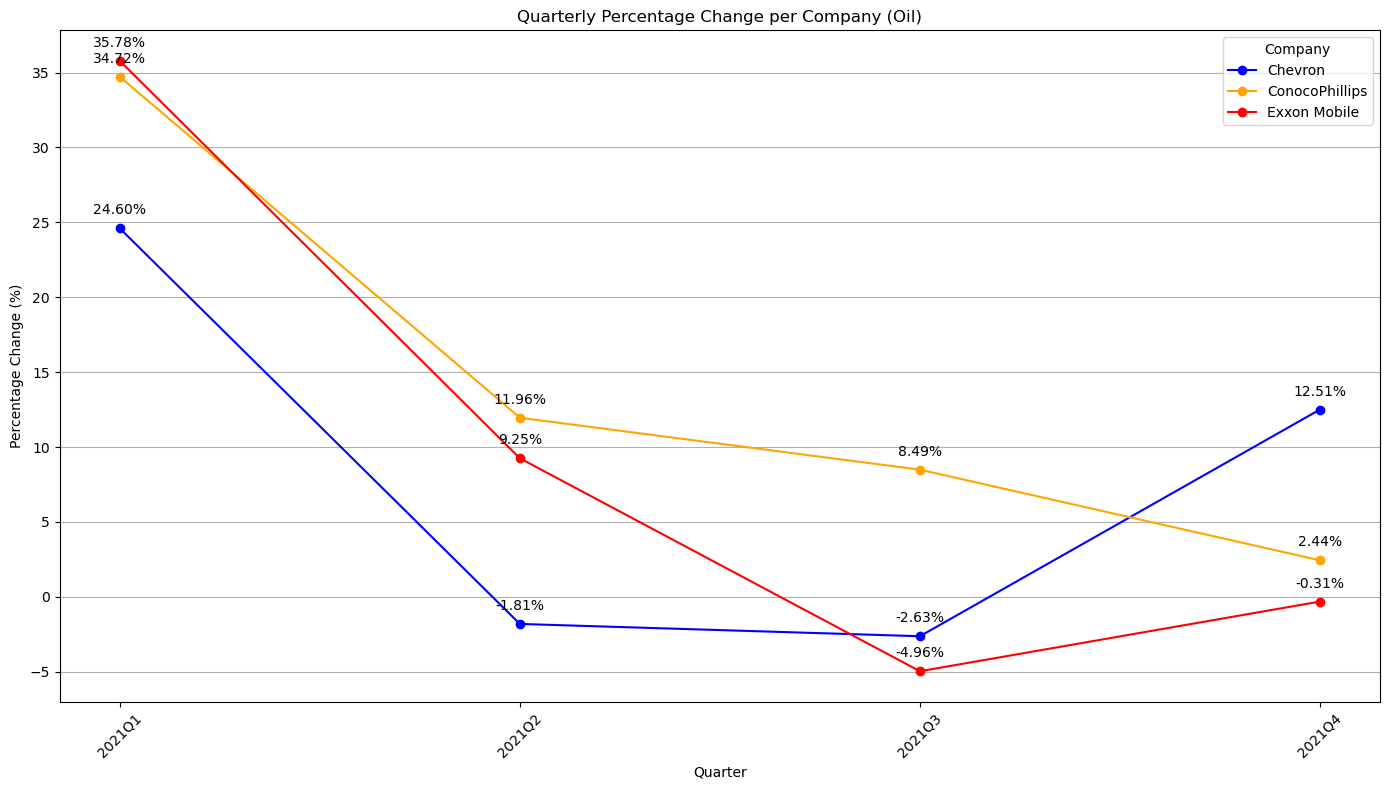

In [29]:
# Calculate the percentage change in Oil Stock for each quarter
quarterly_oil_percentage_change = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False).apply(
    lambda x: pd.Series({
        'Percentage Change': (x.loc[x['Date'].idxmax()]['Open'] - x.loc[x['Date'].idxmin()]['Close']) / x.loc[x['Date'].idxmin()]['Close'] * 100
    })
)

# Convert the 'Quarter' column to string due to formatting error.
quarterly_oil_percentage_change['Quarter'] = quarterly_oil_percentage_change['Quarter'].astype(str)

# Define the colors for each company
oil_colors = {'Exxon Mobile': 'Red', 'Chevron': 'Blue', 'ConocoPhillips': 'Orange'}

# Plot the quarterly percentage change.
plt.figure(figsize=(14, 8))
for company in quarterly_oil_percentage_change['Company'].unique():
    company_data = quarterly_oil_percentage_change[quarterly_oil_percentage_change['Company'] == company]
    plt.plot(company_data['Quarter'], company_data['Percentage Change'], marker='o', label=company, color=oil_colors[company])
    
    # Annotate each percentage change by stock per quarter.
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Percentage Change']:.2f}%", 
                     (row['Quarter'], row['Percentage Change']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting.
plt.title('Quarterly Percentage Change per Company (Oil)')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts the plot to ensure everything fits
plt.savefig('outputs/oil_stock_change.png')
plt.show()


C:\Users\Juanb\AppData\Local\Temp\ipykernel_12580\4128324707.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_tele_percentage_change = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False).apply(


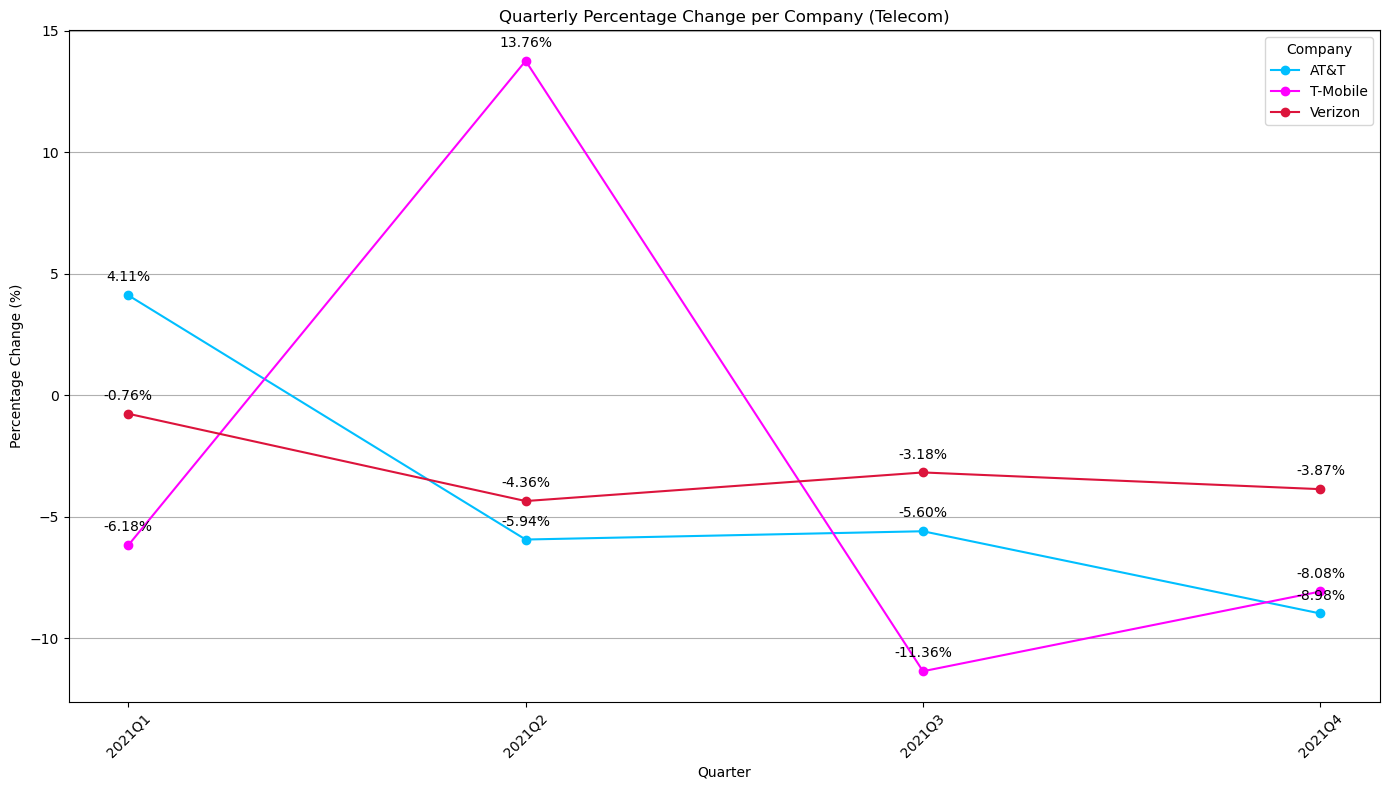

In [30]:
# Calculate the percentage change in Telecom Stock for each quarter
quarterly_tele_percentage_change = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False).apply(
    lambda x: pd.Series({
        'Percentage Change': (x.loc[x['Date'].idxmax()]['Open'] - x.loc[x['Date'].idxmin()]['Close']) / x.loc[x['Date'].idxmin()]['Close'] * 100
    })
)

# Convert the 'Quarter' column to string due to formatting error
quarterly_tele_percentage_change['Quarter'] = quarterly_tele_percentage_change['Quarter'].astype(str)

# Define the colors for each company
tele_colors = {'AT&T': 'Deepskyblue', 'T-Mobile': 'Fuchsia', 'Verizon': 'Crimson'}

# Plot the quarterly percentage change
plt.figure(figsize=(14, 8))
for company in quarterly_tele_percentage_change['Company'].unique():
    company_data = quarterly_tele_percentage_change[quarterly_tele_percentage_change['Company'] == company]
    plt.plot(company_data['Quarter'], company_data['Percentage Change'], marker='o', label=company, color=tele_colors[company])
    
    # Annotate each percentage change by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Percentage Change']:.2f}%", 
                     (row['Quarter'], row['Percentage Change']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Percentage Change per Company (Telecom)')
plt.xlabel('Quarter')
plt.ylabel('Percentage Change (%)')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/telecom_stock_change.png')
plt.show()


### Stock Volume Change: Indicates the trading activity and liquidity of a stock, reflecting investor interest and potential price movements.

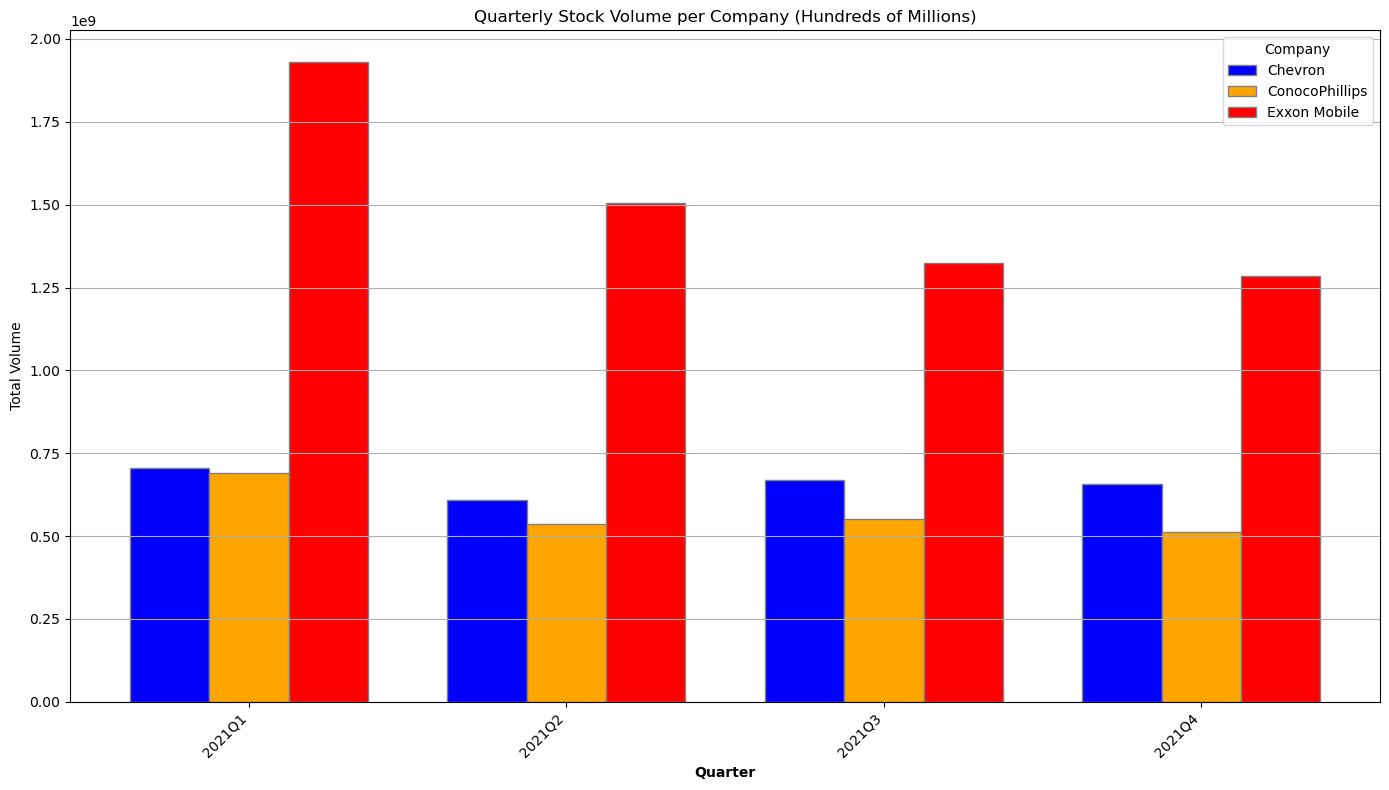

In [31]:
# Calculate the quarterly Oil Stock Volume change per quarter.
quarterly_oil_volume = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False).agg({
    'Volume': 'sum'
})

# Convert the Quarter to a string for plotting due to possible errors.
quarterly_oil_volume['Quarter'] = quarterly_oil_volume['Quarter'].astype(str)

# Get unique quarters and companies
unique_quarters = quarterly_oil_volume['Quarter'].unique()
unique_companies = quarterly_oil_volume['Company'].unique()

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(unique_quarters))  # First set of positions
r2 = [x + bar_width for x in r1]  # Second set of positions
r3 = [x + bar_width for x in r2]  # Third set of positions

# Plot the bars
plt.figure(figsize=(14, 8))

for i, company in enumerate(unique_companies):
    company_data = quarterly_oil_volume[quarterly_oil_volume['Company'] == company]
    positions = [x + i * bar_width for x in r1]  # Adjust position for each company
    plt.bar(positions, company_data['Volume'], width=bar_width, edgecolor='grey', label=company, color=oil_colors[company])

# Plot visual formatting.
# Add xticks on the middle of the group bars
plt.xlabel('Quarter', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(unique_quarters))], unique_quarters)

plt.title('Quarterly Stock Volume per Company (Hundreds of Millions)')
plt.ylabel('Total Volume')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/oil_stock_volume.png')
plt.show()


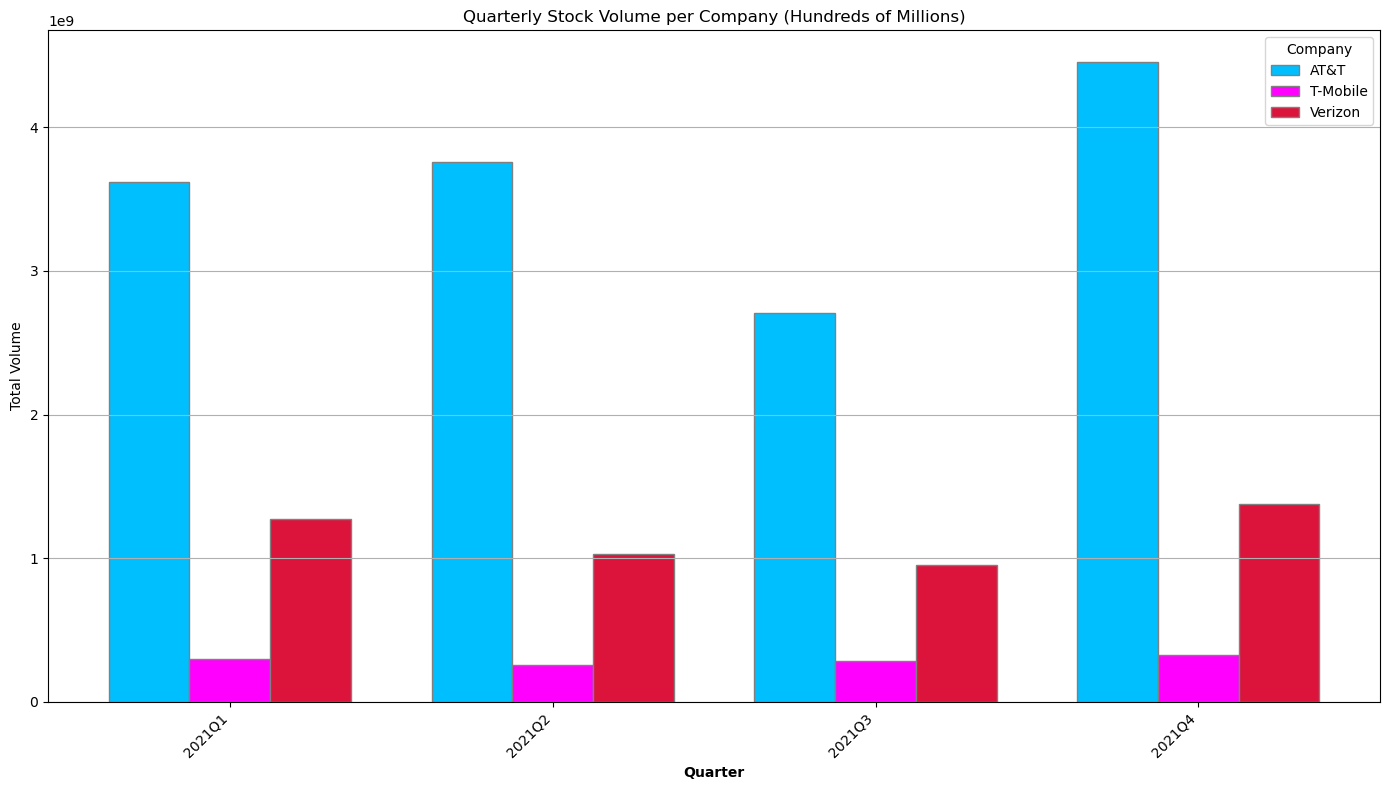

In [32]:
# Calculate the quarterly Telecom Stock Volume change per quarter
quarterly_tele_volume = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False).agg({
    'Volume': 'sum'
})

# Convert the Quarter to a string for plotting
quarterly_tele_volume['Quarter'] = quarterly_tele_volume['Quarter'].astype(str)

# Get unique quarters and companies
unique_quarters = quarterly_tele_volume['Quarter'].unique()
unique_companies = quarterly_tele_volume['Company'].unique()

# Set the width of the bars
bar_width = 0.25

# Set the position of the bars on the x-axis
r1 = range(len(unique_quarters))  # First set of positions
r2 = [x + bar_width for x in r1]  # Second set of positions
r3 = [x + bar_width for x in r2]  # Third set of positions

# Plot the bars
plt.figure(figsize=(14, 8))

for i, company in enumerate(unique_companies):
    company_data = quarterly_tele_volume[quarterly_tele_volume['Company'] == company]
    positions = [x + i * bar_width for x in r1]  # Adjust position for each company
    plt.bar(positions, company_data['Volume'], width=bar_width, edgecolor='grey', label=company, color=tele_colors[company])

# Plot visual formatting
# Add xticks on the middle of the group bars
plt.xlabel('Quarter', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(unique_quarters))], unique_quarters)

plt.title('Quarterly Stock Volume per Company (Hundreds of Millions)')
plt.ylabel('Total Volume')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/tele_stock_volume.png')
plt.show()


### Standard Deviation (Volatility): Assesses the risk associated with a stock by measuring the variability of its returns, aiding in risk management and investment decisions.

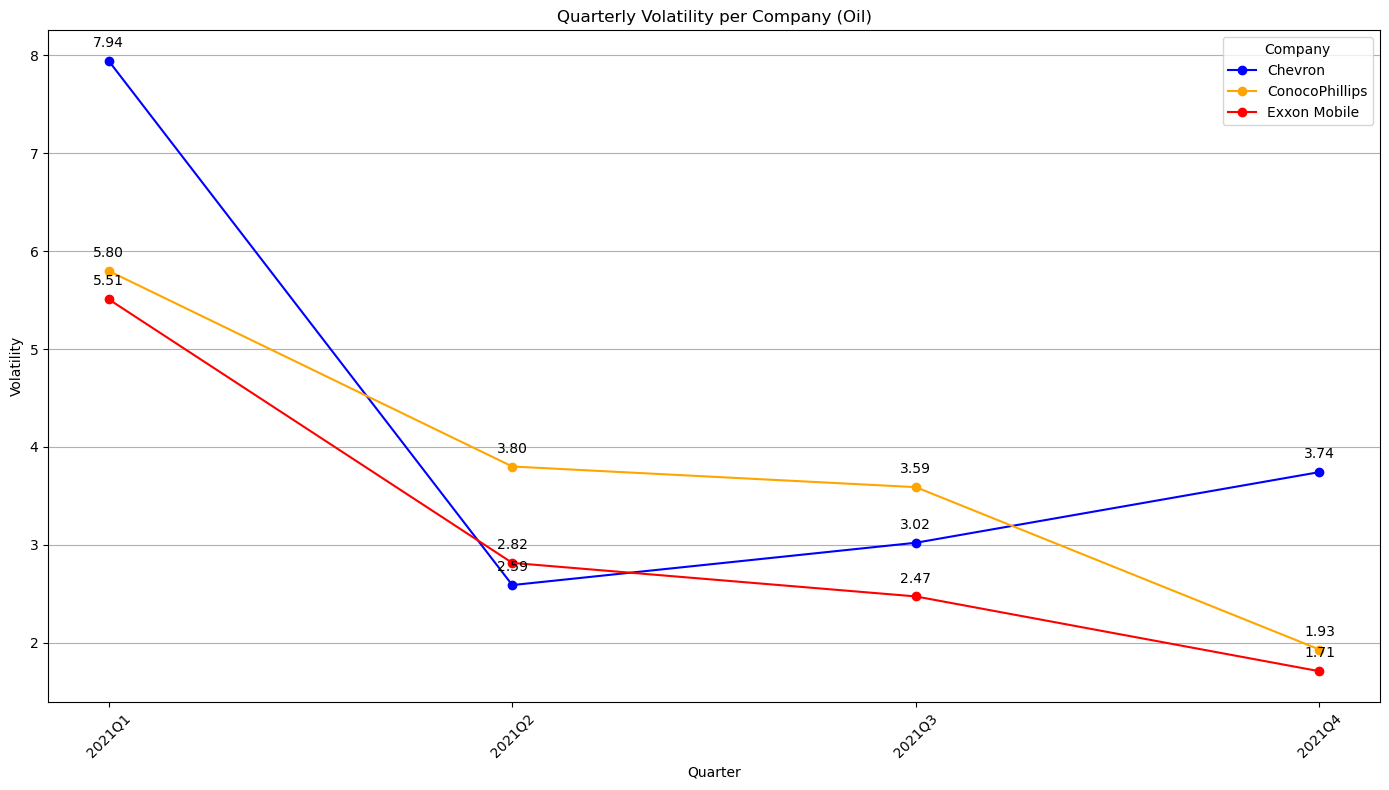

,Company,Quarter,Volatility
0,Chevron,2021Q1,7.943149
1,Chevron,2021Q2,2.588803
2,Chevron,2021Q3,3.021084
3,Chevron,2021Q4,3.742836
4,ConocoPhillips,2021Q1,5.797776
5,ConocoPhillips,2021Q2,3.799867
6,ConocoPhillips,2021Q3,3.588901
7,ConocoPhillips,2021Q4,1.930463
8,Exxon Mobile,2021Q1,5.507866
9,Exxon Mobile,2021Q2,2.815312


In [33]:
# Calculate the standard deviation (volatility) in oil Stock for each quarter
quarterly_oil_volatility = filtered_oil_data.groupby(['Company', 'Quarter'], as_index=False)['Close'].std()
quarterly_oil_volatility.rename(columns={'Close': 'Volatility'}, inplace=True)

# Convert the 'Quarter' column to string for plotting
quarterly_oil_volatility['Quarter'] = quarterly_oil_volatility['Quarter'].astype(str)

# Plot the quarterly volatility
plt.figure(figsize=(14, 8))

for company in quarterly_oil_volatility['Company'].unique():
    company_data = quarterly_oil_volatility[quarterly_oil_volatility['Company'] == company]
    plt.plot(company_data['Quarter'], company_data['Volatility'], marker='o', label=company, color=oil_colors[company])
    
    # Annotate each volatility by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Volatility']:.2f}", 
                     (row['Quarter'], row['Volatility']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Volatility per Company (Oil)')
plt.xlabel('Quarter')
plt.ylabel('Volatility')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/oil_volatility.png')
plt.show()

# Output the quarterly oil volatility data
quarterly_oil_volatility


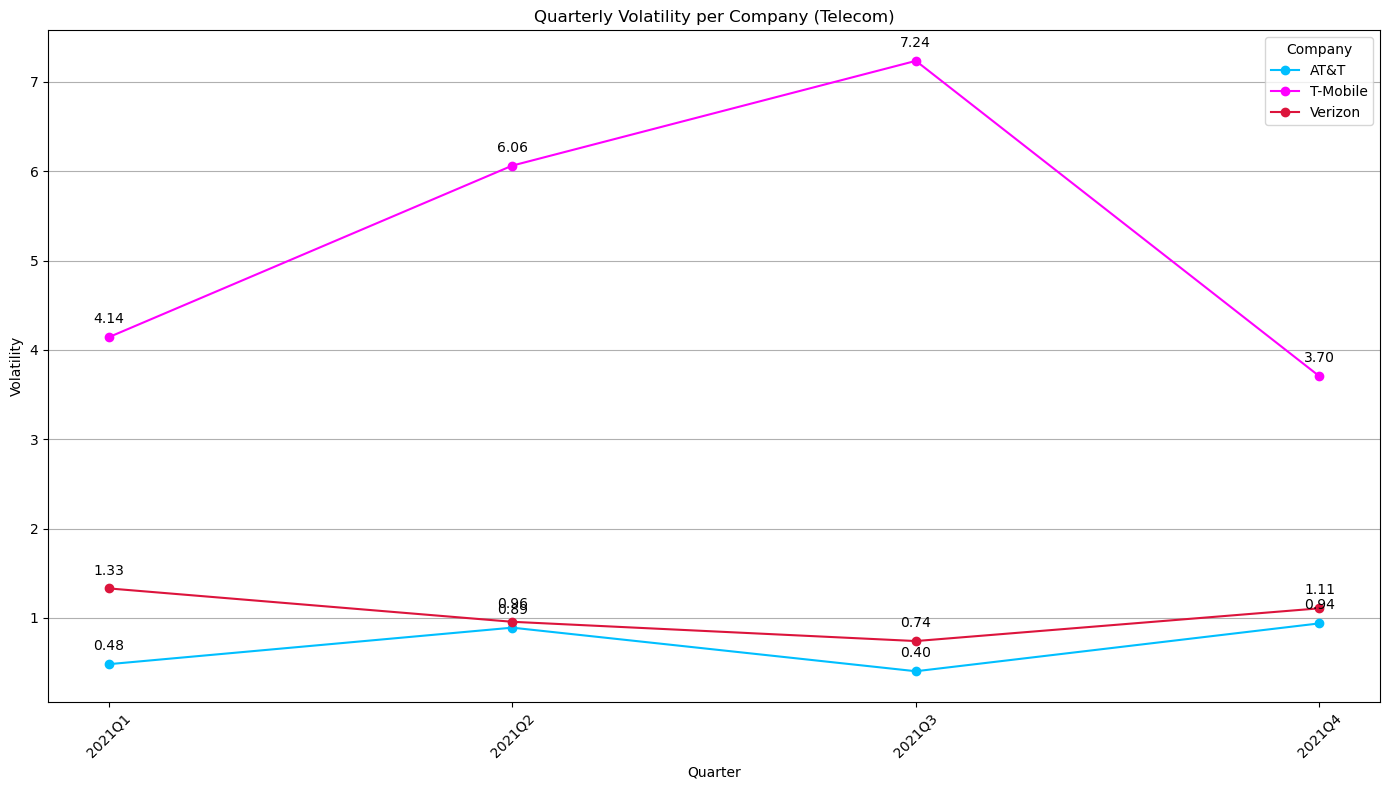

,Company,Quarter,Volatility
0,AT&T,2021Q1,0.481606
1,AT&T,2021Q2,0.890464
2,AT&T,2021Q3,0.402678
3,AT&T,2021Q4,0.938528
4,T-Mobile,2021Q1,4.141775
5,T-Mobile,2021Q2,6.063111
6,T-Mobile,2021Q3,7.235863
7,T-Mobile,2021Q4,3.704424
8,Verizon,2021Q1,1.329955
9,Verizon,2021Q2,0.956256


In [34]:
# Calculate the standard deviation (volatility) in telecom Stock for each quarter
quarterly_tele_volatility = filtered_tele_data.groupby(['Company', 'Quarter'], as_index=False)['Close'].std()
quarterly_tele_volatility.rename(columns={'Close': 'Volatility'}, inplace=True)

# Convert the 'Quarter' column to string for plotting
quarterly_tele_volatility['Quarter'] = quarterly_tele_volatility['Quarter'].astype(str)

# Plot the quarterly volatility
plt.figure(figsize=(14, 8))

for company in quarterly_tele_volatility['Company'].unique():
    company_data = quarterly_tele_volatility[quarterly_tele_volatility['Company'] == company]
    plt.plot(company_data['Quarter'], company_data['Volatility'], marker='o', label=company, color=tele_colors[company])
    
    # Annotate each volatility by stock per quarter
    for i, row in company_data.iterrows():
        plt.annotate(f"{row['Volatility']:.2f}", 
                     (row['Quarter'], row['Volatility']), 
                     textcoords="offset points", xytext=(0,10), ha='center')

# Plot visual formatting
plt.title('Quarterly Volatility per Company (Telecom)')
plt.xlabel('Quarter')
plt.ylabel('Volatility')
plt.legend(title='Company')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('outputs/telecom_volatility.png')
plt.show()

# Output the quarterly telecom volatility data
quarterly_tele_volatility


### Return on Investment (ROI): Evaluates the profitability of an investment, enabling investors to gauge the efficiency of their investment choices and compare different investment opportunities.

C:\Users\Juanb\AppData\Local\Temp\ipykernel_12580\3359970542.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_oil_roi = filtered_oil_data.groupby(['Company', 'Quarter']).apply(oil_roi).reset_index()
C:\Users\Juanb\AppData\Local\Temp\ipykernel_12580\3359970542.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  quarterly_oil_roi = pd.concat([initial_investment, quarterly_oil_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

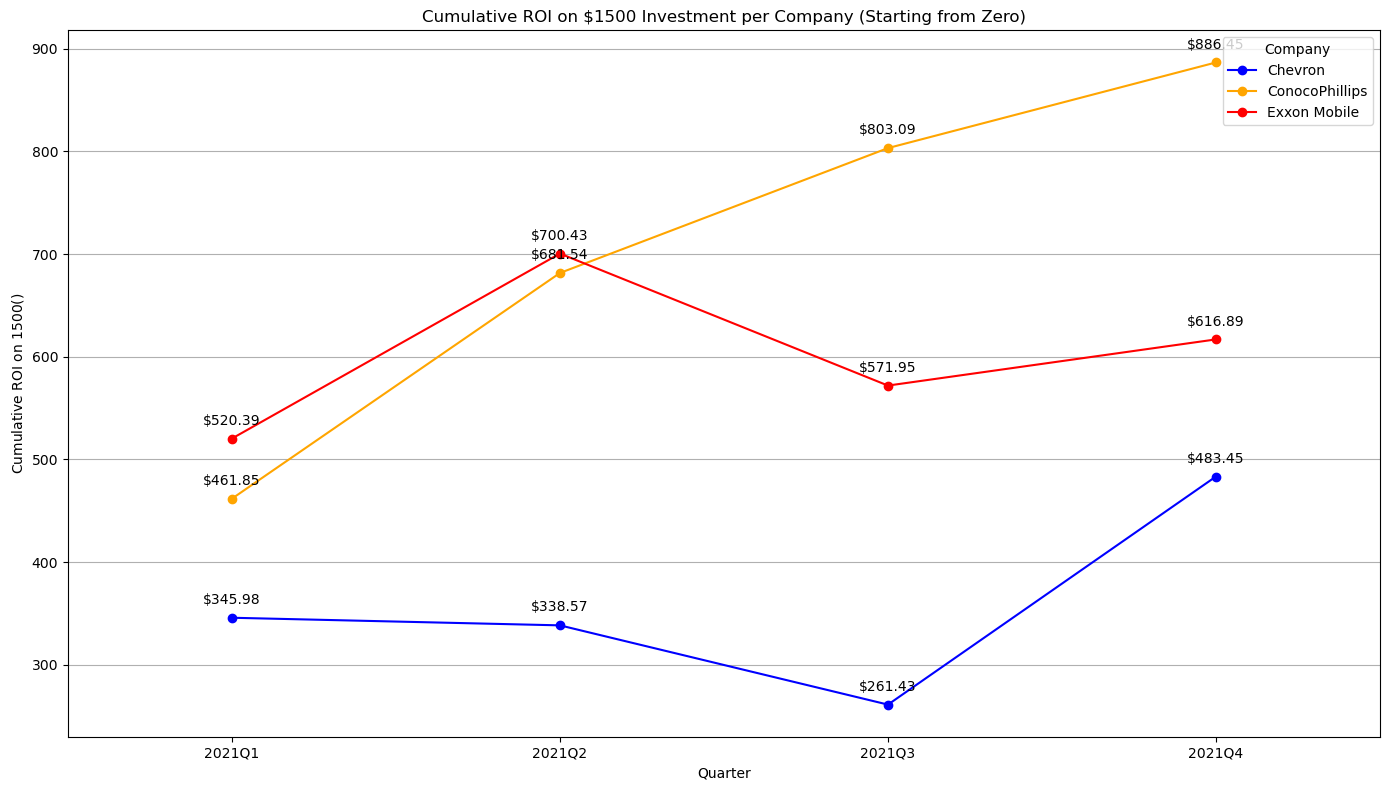

In [35]:
# Get the opening price on 2020-01-02 for each company (change the date if necessary)
initial_prices = filtered_oil_data[filtered_oil_data['Date'] == pd.Timestamp('2020-01-02')].set_index('Company')['Open']

# Calculate the ROI based on quarter opening and closing prices of the Oil Stocks Data
def oil_roi(group):
    opening_price = group.iloc[0]['Open']
    closing_price = group.iloc[-1]['Close']
    roi_percentage = ((closing_price - opening_price) / opening_price) * 100
    return pd.Series({
        'Quarter ROI (%)': roi_percentage,
        'ROI on $1500 ($)': (roi_percentage / 100) * 1500
    })

# Apply the ROI calculation to each company for each quarter
quarterly_oil_roi = filtered_oil_data.groupby(['Company', 'Quarter']).apply(oil_roi).reset_index()

# Initialize cumulative ROI with zero
initial_investment = pd.DataFrame({
    'Company': initial_prices.index,
    'Quarter': '0',
    'Quarter ROI (%)': 0,
    'ROI on $1500 ($)': 0,
    'Cumulative ROI on $1500 ($)': 0
})

# Ensure that the cumulative ROI starts from zero for each company
quarterly_oil_roi['Cumulative ROI on $1500 ($)'] = quarterly_oil_roi.groupby('Company')['ROI on $1500 ($)'].cumsum()
quarterly_oil_roi = pd.concat([initial_investment, quarterly_oil_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

# Convert the 'Quarter' column to string
quarterly_oil_roi['Quarter'] = quarterly_oil_roi['Quarter'].astype(str)

# Remove the final zero point at the end for each company
quarterly_oil_roi = quarterly_oil_roi[quarterly_oil_roi['Quarter'] != '0']

# Plot the cumulative ROI on a $1500 investment starting from zero
plt.figure(figsize=(14, 8))

for company in quarterly_oil_roi['Company'].unique():
    company_data = quarterly_oil_roi[quarterly_oil_roi['Company'] == company]
    plt.plot(company_data['Quarter'].astype(str), company_data['Cumulative ROI on $1500 ($)'], marker='o', label=company, color=oil_colors[company])

    # Annotate each point with the Y value
    for i, row in company_data.iterrows():
        if company == 'Chevron' and row['Quarter'] == '2020Q1':
            plt.annotate(f"${row['Cumulative ROI on $1500 ($)']:.2f}", (row['Quarter'], row['Cumulative ROI on $1500 ($)']), textcoords="offset points",
                         xytext=(0, -15), ha='center')  # Lower the annotation for Chevron in Q1
        else:
            plt.annotate(f"${row['Cumulative ROI on $1500 ($)']:.2f}", (row['Quarter'], row['Cumulative ROI on $1500 ($)']), textcoords="offset points",
                         xytext=(0, 10), ha='center')

# Plot visual formatting.
# Define the x-tick positions and labels
xticks_positions = range(len(quarterly_oil_roi['Quarter'].unique()))
xticks_labels = quarterly_oil_roi['Quarter'].unique()

plt.xticks(xticks_positions, xticks_labels)

# Set x-axis limits to include space before the first quarter
plt.xlim(left=-0.5, right=len(xticks_positions)-0.5)

plt.title('Cumulative ROI on $1500 Investment per Company (Starting from Zero)')
plt.xlabel('Quarter')
plt.ylabel('Cumulative ROI on $1500 ($)')
plt.legend(title='Company')
plt.grid(True, axis='y')  # Horizontal grid lines only
plt.tight_layout()
plt.savefig('outputs/oil_roi.png')
plt.show()


C:\Users\Juanb\AppData\Local\Temp\ipykernel_12580\96185214.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  quarterly_tele_roi = filtered_tele_data.groupby(['Company', 'Quarter']).apply(tele_roi).reset_index()
C:\Users\Juanb\AppData\Local\Temp\ipykernel_12580\96185214.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  quarterly_tele_roi = pd.concat([initial_investment, quarterly_tele_roi], ignore_index=True).sort_values(by=['Company', 'Quarter']

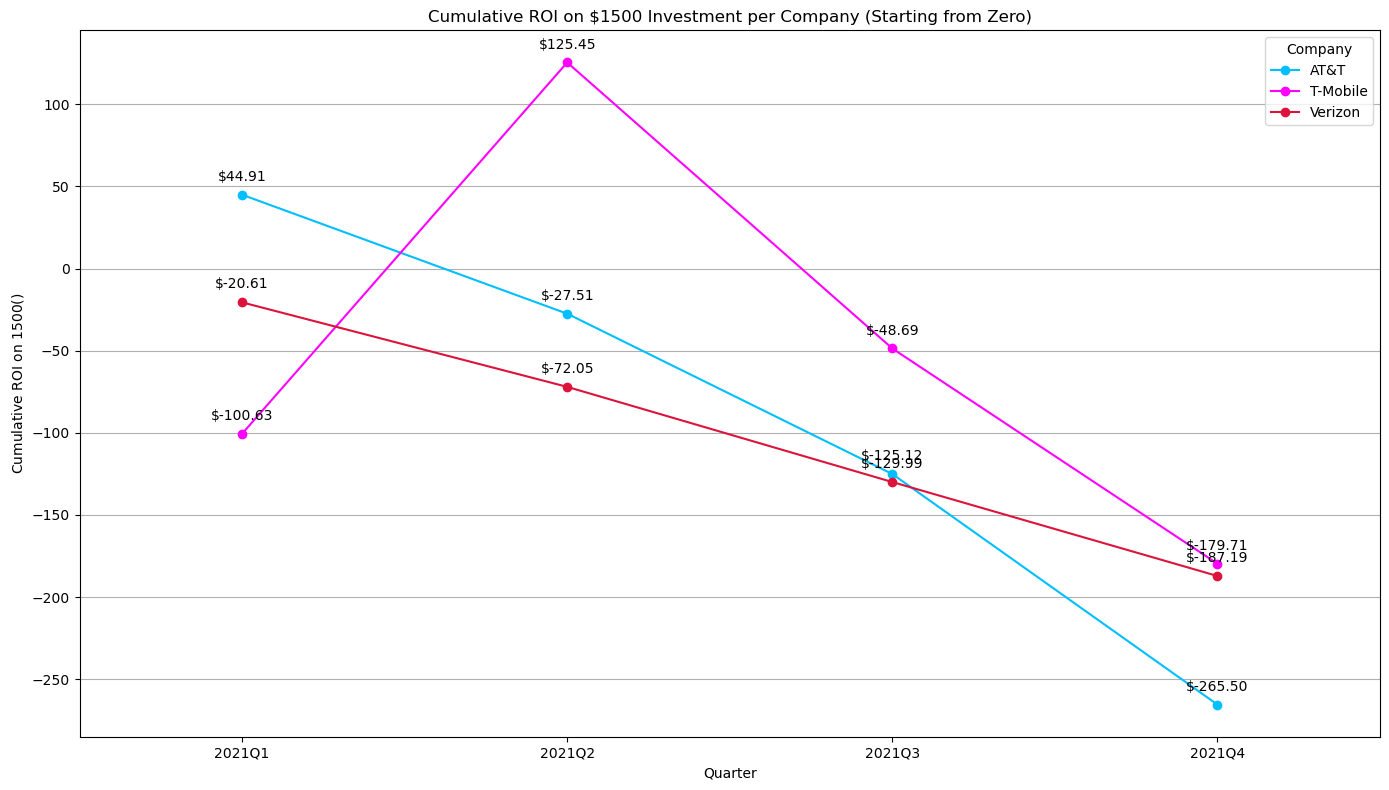

In [36]:
# Get the opening price on 2020-01-02 for each company (change the date if necessary)
initial_prices_tele = filtered_tele_data[filtered_tele_data['Date'] == pd.Timestamp('2020-01-02')].set_index('Company')['Open']

# Calculate the ROI based on quarter opening and closing prices of the telecom Stocks Data
def tele_roi(group):
    opening_price = group.iloc[0]['Open']
    closing_price = group.iloc[-1]['Close']
    roi_percentage = ((closing_price - opening_price) / opening_price) * 100
    return pd.Series({
        'Quarter ROI (%)': roi_percentage,
        'ROI on $1500 ($)': (roi_percentage / 100) * 1500
    })

# Apply the ROI calculation to each company for each quarter
quarterly_tele_roi = filtered_tele_data.groupby(['Company', 'Quarter']).apply(tele_roi).reset_index()

# Initialize cumulative ROI with zero
initial_investment = pd.DataFrame({
    'Company': initial_prices_tele.index,
    'Quarter': '0',
    'Quarter ROI (%)': 0,
    'ROI on $1500 ($)': 0,
    'Cumulative ROI on $1500 ($)': 0
})

# Ensure that the cumulative ROI starts from zero for each company
quarterly_tele_roi['Cumulative ROI on $1500 ($)'] = quarterly_tele_roi.groupby('Company')['ROI on $1500 ($)'].cumsum()
quarterly_tele_roi = pd.concat([initial_investment, quarterly_tele_roi], ignore_index=True).sort_values(by=['Company', 'Quarter'])

# Convert the 'Quarter' column to string
quarterly_tele_roi['Quarter'] = quarterly_tele_roi['Quarter'].astype(str)

# Remove the final zero point at the end for each company
quarterly_tele_roi = quarterly_tele_roi[quarterly_tele_roi['Quarter'] != '0']

# Plot the cumulative ROI on a $1500 investment starting from zero
plt.figure(figsize=(14, 8))

for company in quarterly_tele_roi['Company'].unique():
    company_data = quarterly_tele_roi[quarterly_tele_roi['Company'] == company]
    plt.plot(company_data['Quarter'].astype(str), company_data['Cumulative ROI on $1500 ($)'], marker='o', label=company, color=tele_colors[company])

    # Annotate each point with the Y value
    for i, row in company_data.iterrows():
        plt.annotate(f"${row['Cumulative ROI on $1500 ($)']:.2f}", (row['Quarter'], row['Cumulative ROI on $1500 ($)']), textcoords="offset points",
                     xytext=(0, 10), ha='center')

# Plot visual formatting.
# Define the x-tick positions and labels
xticks_positions = range(len(quarterly_tele_roi['Quarter'].unique()))
xticks_labels = quarterly_tele_roi['Quarter'].unique()

plt.xticks(xticks_positions, xticks_labels)

# Set x-axis limits to include space before the first quarter
plt.xlim(left=-0.5, right=len(xticks_positions)-0.5)

plt.title('Cumulative ROI on $1500 Investment per Company (Starting from Zero)')
plt.xlabel('Quarter')
plt.ylabel('Cumulative ROI on $1500 ($)')
plt.legend(title='Company')
plt.grid(True, axis='y')  # Horizontal grid lines only
plt.tight_layout()
plt.savefig('outputs/tele_roi.png')
plt.show()
